# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Преамбула**

Задача данного проекта - проанализировать многолетний архив объявлений о продаже квартир в Санкт-Петербурге и пригородах с целью установления параметров определения их рыночной стоимости, чтобы на их основании автоматизировать процесс определения рыночной цены, а также выявить различные отклонения, в том числе мошенничество.

Весь пайплайн процесса, конечно, не будет представлен, т.к. запрос от бизнеса, уточнение задачи, сбор данных уже проведены, и это учебный проект, но основные этапы в непосредственной работе с данными будут представлены: предобработка данных, расчёты, исследовательский анализ и общий вывод.

В работе будет использована библиотека pandas, библиотека для работы с графиками matplotlib.

## Изучение данных из файла

In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('/datasets/real_estate_data.csv')
display(data.head(10))
data.info()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


### Вывод

Итак, с помощью библиотеки pandas я открыла файл, вывела на экран первые 10 строк и запросила информацию о таблице. Таблица выглядит некрасиво, потому что данные "склеились".

Из информации о таблице следует, что тут 1 колонка, но причина этого уже понятна. Строк 23699, что означает приличную выборку для такого исследования. Объём занимаемого места - 185,3 кб - таблица мала, но очень информативна)).

Понятно, что перечислены названия колонок, но в следующем разделе разберёмся с ними поподробнее.

## Предобработка данных

In [3]:
data = pandas.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Теперь мы видим нормальную таблицу, по крайней мере, с точки зрения формы; в таблице нормальные 22 поименованные колонки. К содержанию же есть претензии:
- пропуски в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition
- cityCenters_nearest не в змеином регистре, но полагаю, раз это единственное название в таком стиле, то это не систематическая ошибка, а просто автор показал, что слово двухсоставное и так написал, пусть так останется.
- Размер таблицы увеличился до 3,7 МБ.

In [4]:
#разберёмся со столбцом ceiling_height
display('Медианная высота', data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
display('макс. высота потолка', data['ceiling_height'].max())
display('мин. высота потолка', data['ceiling_height'].min())


'Медианная высота'

2.65

'макс. высота потолка'

100.0

'мин. высота потолка'

1.0

Высоту потолков можно заполнить просто медианным значением по столбцу. 2,65 - вполне реальная высота среднестатистических потолков. В датафрейме есть выбивающиеся значения (квартира-храм???), и мы поэтому берём медиану. Высота 1 м - странная. Пропуски наверняка связаны с незнанием пользователя о высоте своих потолков.

In [5]:
#теперь с floors_total то же самое и заменим на целое
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype(int)

Количество этажей в доме не самая важная характеристика, к тому же пропусков здесь очень мало, тоже заполним медианой по столбцу. Вероятно, пользователь не вносил этот параметр по невнимательности или просто лени. И ещё заменим на целое, т.к. в домах указывается целое количество этажей.

In [6]:
#пропуски в living_area заполним медианой с группировкой по rooms
for room in data['rooms'].unique():
    median = data.loc[data['rooms'] == room, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = median
#Также посмотрим максимульные и минимальные значения, чтобы убедиться, что всё в квадратных метрах
display('макс. ж/площадь', data['living_area'].max())
display('мин. ж/площадь', data['living_area'].min())

'макс. ж/площадь'

409.7

'мин. ж/площадь'

2.0

Отсутствие значений в жилой площади заполним медианой с группировкой по количеству комнат. Максимальное значение жилой площади - 409,7. Полагаю, что всё ок, километров нет. А вот минимальное - 2,0. Надо запомнить этот момент и отследить на графиках. Но всё равно это не сантиметры и не километры.

In [7]:
#перейдём к is_apartment
display(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(False)

array([nan, False, True], dtype=object)

По апартаментам всё просто: скорее всего, если значение пропущено, то это не апартаменты, поэтому заменяем пропущенные значения на False.

In [8]:
#в kitchen_area тоже есть немного пропусков, поступим с ними также как с жилой площадью
for room in data['rooms'].unique():
    median = data.loc[data['rooms'] == room, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == room), 'kitchen_area'] = median
#Также посмотрим максимульные и минимальные значения, чтобы убедиться, что всё в квадратных метрах
display('макс. кух/площадь', data['kitchen_area'].max())
display('мин. кух/площадь', data['kitchen_area'].min())
#проверим, сколько апартаментов в данных
display(data['is_apartment'].value_counts())

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


'макс. кух/площадь'

112.0

'мин. кух/площадь'

1.3

False    23649
True        50
Name: is_apartment, dtype: int64

С площадью кухни проделано то же самое, что и с жилой площадью. Минимум и максимум похожи на правду. Единственный момент: заполнились не все значения. Но т.к. в данных есть такие объекты, как студии, а в них нет кухни, то это нормально. Таких объектов 197. Правда, апартаментов всего 50 в таблице. Если однокомнатные апартаменты считаются студиями, то похоже на правду. И вообще этих непонятных данных меньше 1%, будем их игнорировать.

In [9]:
#с balcony поступим также как с апартаментами и заменим на целое число
display(data['balcony'].unique())
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Значения в столбце с информацией о балконах - nan,  2.,  0.,  1.,  5.,  4.,  3. Похоже на правду. Но очень много пропущенных значений. Полагаю, раз пользователь не разместил информацию о балконах в объявлении, то их либо совсем не было, либо он не считался особо важным показателем, влияющим на цену в данном объекте. А вот владельцы квартир с 5 балконами вряд ли бы умолчали об этом. Поэтому пропуски заменила на ноль. Балконы заменим на целое число, т.к. не может быть полтора или два с половиной балкона.

In [10]:
#пропускам в locality_name дадим название "Без названия"
data['locality_name'] = data['locality_name'].fillna('Без названия')

Есть 49 пропущенных значений в locality_name. Вероятно, это какие-то места на окраинах, вне населённых пунктов, такое бывает, Россия большая)). Заменим отсутствие на "Без названия". Возможно, пригодится для группировки.

In [11]:
#в first_day_exposition меняем тип object на datetime64[ns]
data['first_day_exposition'] = pandas.to_datetime(data['first_day_exposition'])

В дате публикации меняем тип object на datetime64[ns], иначе потом с этим столбцом невозможно будет провести никаких манипуляций. Пропуски в дате, наверняка, технической природы. Что-то недовыгрузилось.

In [12]:
#в картографических данных заменим пропущенные значения медианой с группировкой по населенному пункту
#после этого заполнились не все пропуски, заполним их общей медианой
for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == name), 'airports_nearest'] = median
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
    
for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == name), 'cityCenters_nearest'] = median
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'parks_around3000'].median()
    data.loc[(data['parks_around3000'].isna()) & (data['locality_name'] == name), 'parks_around3000'] = median
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
#заменим количество парков на целое число
data['parks_around3000'] = data['parks_around3000'].astype(int)

for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name'] == name), 'parks_nearest'] = median    
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'ponds_around3000'].median()
    data.loc[(data['ponds_around3000'].isna()) & (data['locality_name'] == name), 'ponds_around3000'] = median 
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
#заменим количество водоёмов на целое число
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name'] == name), 'ponds_nearest'] = median    
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,460.0,0,584.5,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     18313 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

Целый раздел картографических данных имеет много пропусков. Скорее всего, пропуски принадлежат объектам вне Санкт-Петербурга. Пропуски в расстояниях до разных объектов (кроме расстояния до центра) заменим медианой с группировкой по населенному пункту, а оставшиеся после этого заменим общей медианой. Но в реальности я бы по голове не погладила того, кто подгружал картографические данные к датафрейму. Или технология не отработана, или человеческий фактор, но в любом случае, этот вопрос надо было бы обсудить с командой. Количество парков и водоёмов в радиусе 3 км заменим на целое число. В объявлении же не указывается, что количество водоёмов столько-то и пара луж впридачу)))

## Расчёты и добавление результатов в таблицу

Согласно заданию, нам необходимо посчитать и добавить в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


In [13]:
#рассчитаем цену кв.метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

#добавляем день недели, месяц и год публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#добавляем категорию этажа квартиры
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']


display(data.head())
data.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,living_to_total,kitchen_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,584.5,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images              23699 non-null int64
last_price                23699 non-null float64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23699 non-null int64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23502 non-null float64
balcony                   23699 non-null int64
locality_name             23699 non-null object
airports_nearest          23699 non-null float64
cityCenters_nearest       18313 non-null float64
parks_around3000          23699 non-null int64
parks_nearest           

1. Цена 1 кв.м рассчитывается как отношение цены к общей площади, т.е. делим цену в дату продажи на общую площадь и вносим эти данные в новый столбец.

2. Добавила колонку weekday с номером дня недели, где 0 -понедельник, 6 - воскресенье. Добавили также колонки с месяцем и годом.

3. Объявляем функцию, которая определяет категорию этажа - первый, последний или другой. И создаем столбец с категориями этажей.

4. Добавляем столбцы с соотношениями жилой и общей площади, а также площади кухни к общей.

Итак, добавились ещё 7 столбцов.





## Исследовательский анализ данных

**План**

1. Изучить: площадь, цена, число комнат, высота потолков + гистограммы для каждого параметра.

2. Изучить время продажи квартиры + гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

3. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены.

4. Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.

5. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные найти по имени в столбце locality_name.

6. Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах: округлить до целых значений. После этого посчитать среднюю цену для каждого километра. Построить график, показывающий, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.

7. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?


count    23699
mean        60
std         36
min         12
25%         40
50%         52
75%         70
max        900
Name: total_area, dtype: int64

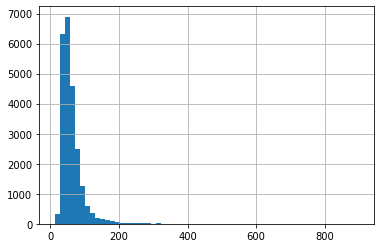

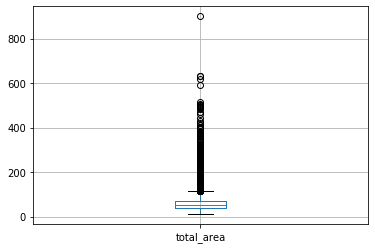

In [14]:
#первый пункт
display(data['total_area'].describe().round(0).astype(int))
data['total_area'].hist(bins=60)
plt.show()
data.boxplot('total_area')
plt.show()

count        23699
mean       6541549
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int64

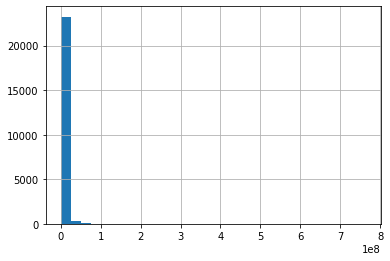

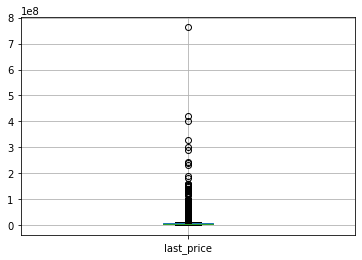

In [15]:
display(data['last_price'].describe().round(0).astype(int))
data['last_price'].hist(bins=30)
plt.show()
data.boxplot('last_price')
plt.show()

count    23699
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

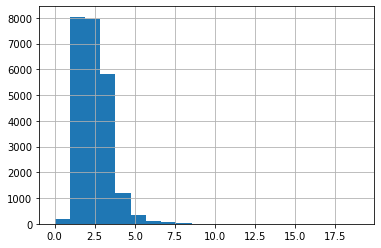

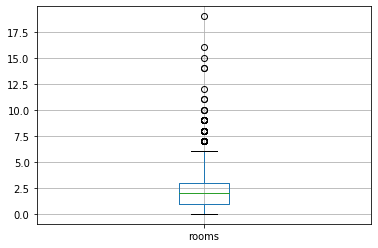

In [16]:
display(data['rooms'].describe().round(0).astype(int))
data['rooms'].hist(bins=20)
plt.show()
data.boxplot('rooms')
plt.show()

count    23699
mean         3
std          1
min          1
25%          3
50%          3
75%          3
max        100
Name: ceiling_height, dtype: int64

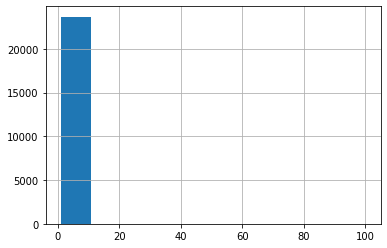

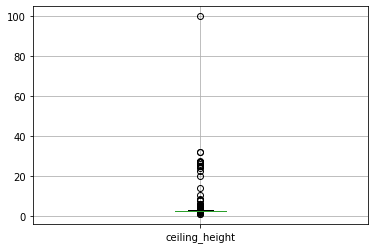

In [17]:
display(data['ceiling_height'].describe().round(0).astype(int))
data['ceiling_height'].hist()
plt.show()
data.boxplot('ceiling_height')
plt.show()

In [18]:
#посмотрим корреляции с ценой
display('корреляция цены с общ площадью',data['last_price'].corr(data['total_area']).round(2))
display('корреляция цены с кол-вом комнат',data['last_price'].corr(data['rooms']).round(2))
display('корреляция цены с высотой потолков',data['last_price'].corr(data['ceiling_height']).round(2))

'корреляция цены с общ площадью'

0.65

'корреляция цены с кол-вом комнат'

0.36

'корреляция цены с высотой потолков'

0.06

Общая площадь: Большинство объектов имеют площадь до 100 кв.м. Среднее - 60 кв.м., медиана 52. По диаграмме размаха видно, что есть выбросы. Межквартильный размах от 40 до 70 кв.м. Минимум - 12 кв.м., максимум 900. Возможно, это и выбросы, но в жизни такие объекты существуют.

Средняя цена объекта - 4,5 млн. Минимальная - 12 т.р. Максимальная - 763 млн. Разброс огромный, стандартное отклонение большое. Видим, что много выбросов. Межквартильный размах показывает, что от 3,4 до 6,8 млн - основной ценник за объект.

Среднее и медианное число комнат - 2. Минимум - 0, максимум 19. 19 - я могу понять, а вот 0 - не понимаю. Скорей всего, это те необычные объекты с низким потолоком и площадью 2 кв.м. Межквартильный размах - от 1 до 3, нормальный.

Средняя и медиана высоты потолков - 3м. Минимум 1, Максимум 100. Питер - город нестандартный). 

Корреляция цены с общ площадью - 0.65. Объяснимая зависимость, стремится к 1, но не сильно; корреляция положительная.
Корреляция цены с кол-вом комнат - 0.36 - не сильно выраженная.
Корреляция цены с высотой потолков - 0.06 - можно сказать, что нет такой зависимости.


count    20518
mean       181
std        220
min          1
25%         45
50%         95
75%        232
max       1580
Name: days_exposition, dtype: int64

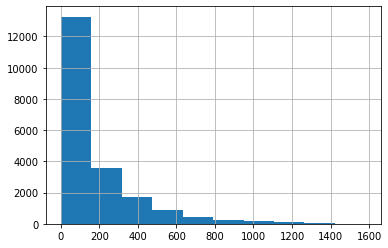

In [19]:
#второй пункт
display(data['days_exposition'].describe().round(0).astype(int))
data['days_exposition'].hist()
plt.show()

На гистограмме мы видим нормальное распределение. Среднее количество дней размещения объекта - 170, медиана 95. Размах - от 45 до 201. Минимум 1 день (либо очень ликвидный объект, либо ошибка, либо продавец передумал), максимум 1580 дней. Это же более 4-х лет! Либо это проблемный объект, либо слишком дорогой, либо его забыли снять с публикации. В общем, в этом случае лучше ориентироваться на медианное значение. Итак, продажа обычно занимает от 45 до 201 дня. В среднем (если можно так сказать о медианном значении) - 95 дней. Полагаю, что продажа в срок до 45 дней - очень быстрая, а дольше 201 дня - долгая.

Далее я закомментировала в предобработке данных заполнение пропусков в days_exposition, чтобы посмотреть сильно ли изменится результат. Результат сильно не изменился, поэтому я делаю вывод о том, что заполнение пропусков медианным значением по населённому пункту - правильное решение.



'слишком маленькие значения общ. площади'

-4.8500000000000085

'слишком большие значения общ. площади'

114.75000000000001

count    22482
mean        54
std         19
min         12
25%         39
50%         50
75%         66
max        115
Name: total_area, dtype: int64

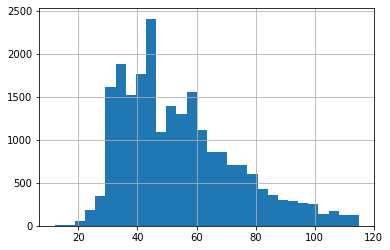

In [20]:
#третий пункт, убираем редкие и выбивающиеся значения
q1 = data['total_area'].quantile(0.25)
q3 = data['total_area'].quantile(0.75)
iqr = q3 - q1
#границы интервала наиболее вероятных значений
extrasmall_total_area = q1 - 1.5 * iqr
display('слишком маленькие значения общ. площади', extrasmall_total_area)
extrabig_total_area = q3 + 1.5 * iqr
display('слишком большие значения общ. площади', extrabig_total_area)
#записываем отфильтрованные данные в новый датафрейм
data_new = data.query('total_area <= 115') 
#проверяем удаление выбросов
display(data_new['total_area'].describe().round(0).astype(int))
#построим гистограмму
data_new['total_area'].hist(bins=30)
plt.show()

Слишком маленькие значения получились отрицательными, потому что первый квантиль слишком мал и разница получилась отрицательная. Оставляю тот код просто для наглядности. Убрала значения более 115 кв.м. Получилось, что мы не слишком много данных удалили, соответственно, урон для таблицы не нанесли. Тем более, что мы создали новую таблицу с очищенными данными data_new.

'q1_price'

3400000.0

'слишком низкая цена'

-1700000.0

'слишком высокая цена'

11900000.0

count       21495
mean      4813684
std       2194426
min        430000
25%       3300000
50%       4400000
75%       5970747
max      11900000
Name: last_price, dtype: int64

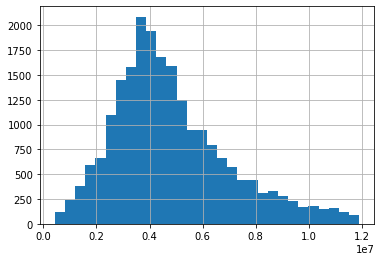

In [21]:
#то же самое проделываем для last_price
q1_price = data['last_price'].quantile(0.25)
display('q1_price', q1_price)
q3_price = data['last_price'].quantile(0.75)
iqr_price = q3_price - q1_price
extrasmall_last_price = q1_price - 1.5 * iqr_price
display('слишком низкая цена', extrasmall_last_price)
extrabig_last_price = q3_price + 1.5 * iqr_price
display('слишком высокая цена', extrabig_last_price)

data_new = data_new.query('400000 <= last_price <= 11900000') 
display(data_new['last_price'].describe().round(0).astype(int))
#display(data_new.info())
#построим гистограмму
data_new['last_price'].hist(bins=30)
plt.show()

Цена не может быть отрицательной, здесь тоже чудеса математики сделали цену отрицательной. Было бы здорово купить квартиру, и чтобы тебе ещё деньги за это дали) Но в жизни так не бывает. Слишком маленькую цену определить достаточно проблематично, но важно, т.к. слишком низкая цена может быть показателем мошенничества. Цена на уровне первого квартиля  3,4 млн. Это жизненная реальная величина. Из предыдущего раздела мы знаем, что минимальная цена 12190 р. Это выбивающееся значение. Если в датасете только квартиры (не гаражи и подобное), то смею предположить, что минимальная цена, ниже которой цены подозрительны - это примерно размер материнского капитала, равный на тот период примерно 400 т.р. Пусть минимальная планка нормальных значений будет такая. Максимум возьмем - третий квартиль плюс полтора размаха. Это 11,9 млн руб.

'q1_rooms'

1.0

'слишком мало комнат'

-2.0

'слишком много комнат'

6.0

count    21300
mean         2
std          1
min          1
25%          1
50%          2
75%          3
max          6
Name: rooms, dtype: int64

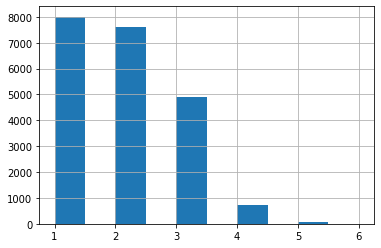

In [22]:
#поработаем с rooms
q1_rooms = data['rooms'].quantile(0.25)
display('q1_rooms', q1_rooms)
q3_rooms = data['rooms'].quantile(0.75)
iqr_rooms = q3_rooms - q1_rooms
extrasmall_rooms = q1_rooms - 1.5 * iqr_rooms
display('слишком мало комнат', extrasmall_rooms)
extrabig_rooms = q3_rooms + 1.5 * iqr_rooms
display('слишком много комнат', extrabig_rooms)
data_new = data_new.query('1 <= rooms <= 6') 
display(data_new['rooms'].describe().round(0).astype(int))
#построим гистограмму
data_new['rooms'].hist(bins=10)
plt.show()

По комнатам сделаем примерно также: минимум, ниже которго выбивающиеся значения, установим 1 комнату; максимум - 6.

'слишком низкие потолки'

2.45

'слишком высокие потолки'

6.0

count    21230.000000
mean         2.671826
std          0.179040
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.300000
Name: ceiling_height, dtype: float64

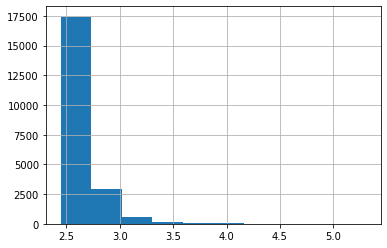

In [23]:
#и наконец ceiling_height
q1_ceil = data['ceiling_height'].quantile(0.25)
q3_ceil = data['ceiling_height'].quantile(0.75)
iqr_ceil = q3_ceil - q1_ceil
extrasmall_ceil = q1_ceil - 1.5 * iqr_ceil
display('слишком низкие потолки', extrasmall_ceil)
extrabig_ceil = q3_rooms + 1.5 * iqr_rooms
display('слишком высокие потолки', extrabig_ceil)
data_new = data_new.query('2.45 <= ceiling_height <= 6') 
display(data_new['ceiling_height'].describe())
#построим гистограмму для потолков в очищенном датафрейме
data_new['ceiling_height'].hist()
plt.show()

Потолки обрежем значениями 2,45 и 6 метров.

'корреляция цены с общ площадью'

0.69

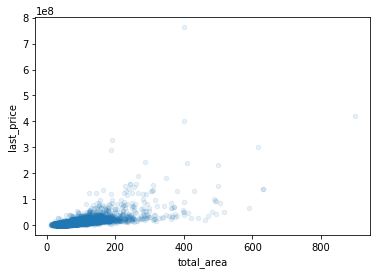

In [24]:
#четвёртый пункт плана, зависимости
#data_new.info()
display('корреляция цены с общ площадью', data_new['last_price'].corr(data_new['total_area']).round(2))
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
#plt.axhline()
plt.show()

Корреляция цены с общей площадью почти 0,7. Диаграмма рассеяния подверждает наличие связи скоплением точек слева внизу.

'корреляция цены кв м с общ площадью'

-0.07

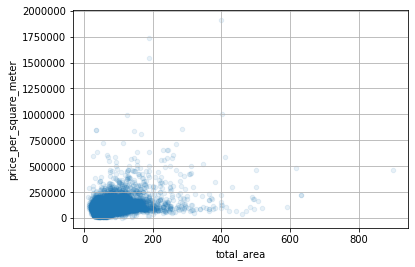

In [25]:
display('корреляция цены кв м с общ площадью', data_new['price_per_square_meter'].corr(data_new['total_area']).round(2))
data.plot(x='total_area', y='price_per_square_meter', kind='scatter', alpha=0.1, grid=True)
plt.show()

Корреляция цены кв м с общей площадью низка и отрицательна, -0,07. Это говорит нам о том, что цена кв метра почти не зависит от общей площади.

Корреляция цены и общей площади ярче выражена, чем корреляция цены за кв метр с общей площадью. Это очевидно, потому что цена за кв метр зависит не от общей площади, а от других параметров. При этом логично, что чем бошльше площадь, тем выше стоимость квартиры. 

'корреляция цены с кол-вом комнат'

0.43

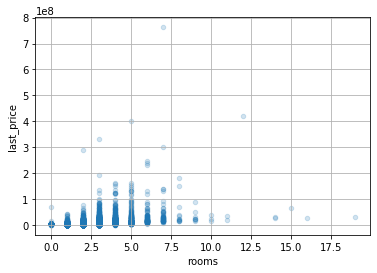

'корреляция цены кв м с кол-вом комнат'

-0.23

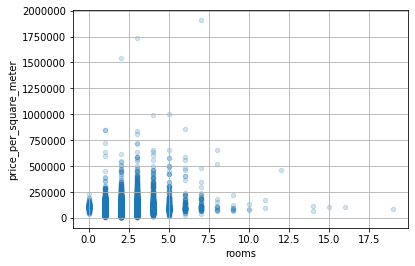

In [26]:
display('корреляция цены с кол-вом комнат', data_new['last_price'].corr(data_new['rooms']).round(2))
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2, grid=True)
plt.show()
display('корреляция цены кв м с кол-вом комнат', data_new['price_per_square_meter'].corr(data_new['rooms']).round(2))
data.plot(x='rooms', y='price_per_square_meter', kind='scatter', alpha=0.2, grid=True)
plt.show()


Зависимость цены от количества комнат не столь выраженная, но положительная, то есть кол-во комнат влияет на общую цену, чем больше комнат, тем выше цена. Но коэфф-т Пирсона всего 0,43.

Цена кв метра и кол-во комнат имеют небольшую и отрицательную зависимость. На диаграмме рассеяния видим бОльший разброс точек, то есть меньшую их концентрацию, соответственно, зависимость меньше.

'корреляция цены кв м с удалённостью от центра'

-0.3996204100816719

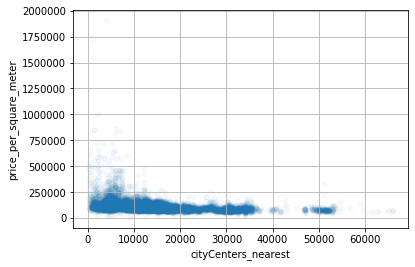

In [27]:
display('корреляция цены кв м с удалённостью от центра', data_new['price_per_square_meter'].corr(data_new['cityCenters_nearest']))
data.plot(x='cityCenters_nearest', y='price_per_square_meter', kind='scatter', alpha=0.03, grid=True)
plt.show()

Корреляция между ценой кв метра и удалённостью от центра - минус 0,4. Чем удалённее от центра, тем дешевле кв метр. Но корреляция не ярко выраженная, это видно и на диаграмме.

(0, 200000)

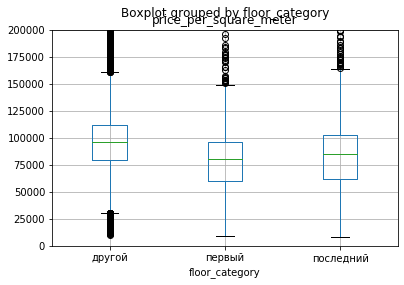

In [28]:
import warnings
warnings.filterwarnings('ignore')
data_new.boxplot(column='price_per_square_meter', by='floor_category')
plt.ylim(0, 200000)

Для анализа зависимости цены от категориальной переменной - категории этажа, лучше построить диаграмму размаха. Видно, что медианная цена промежуточных этажей выше, чем первого и последнего.

,price_per_square_meter
weekday,
0,94688.910380
1,95634.095634
2,95473.807179
3,95143.884892
4,94616.160238
5,93545.716727
6,94501.718213


([<matplotlib.axis.XTick at 0x7fe443bc0a10>,
 <a list of 7 Text xticklabel objects>)

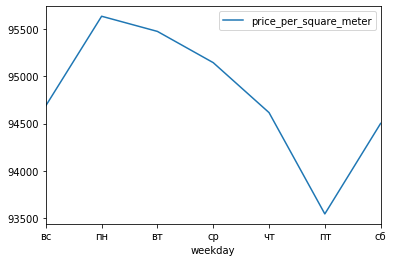

In [29]:
#display('корреляция цены с днём размещения', data_new['price_per_square_meter'].corr(data_new['weekday']))
#display('корреляция цены с месяцем размещения', data_new['price_per_square_meter'].corr(data_new['month']))
#display('корреляция цены с годом размещения', data_new['price_per_square_meter'].corr(data_new['year']))

report = data.groupby('weekday').agg({'price_per_square_meter': 'median'})
display(report)
report.plot()
plt.xticks(report.index.values, ['вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб'])

Зависимость от даты нелинейная, поэтому построили диаграмму зависимости цены кв м от дня публикации объявления. Видим, что по понедельникам публикуются объекты подороже, а по пятница подешевле. Очень интересно! Наверное по понедельникам публикуются объявления агентствами и риэлторами.

,price_per_square_meter
month,
1,95222.437478
2,95000.000000
3,95238.095238
4,96451.612903
5,92857.142857
6,92799.539171
7,95000.000000
8,96026.315789
9,95607.235142


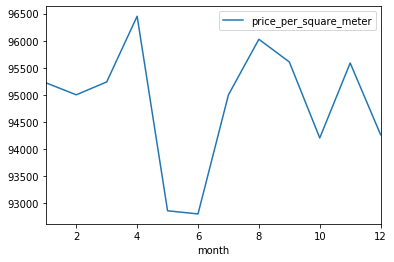

In [30]:
report = data.groupby('month').agg({'price_per_square_meter': 'median'})
display(report)
report.plot()

Видим пики цен в апреле, августе и ноябре. Это сходится с "сарафанной" информацией от риэлторов. Получается, что выгоднее покупать квартиру, выставленную в мае-июне-июле, если это вторичка.

,price_per_square_meter
year,
2014,107000.000000
2015,93414.634146
2016,91743.119266
2017,92565.088448
2018,95689.655172
2019,103305.785124


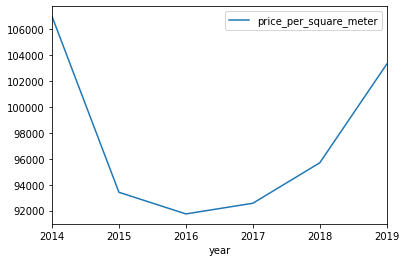

In [31]:
report = data.groupby('year').agg({'price_per_square_meter': 'median'})
display(report)
report.plot()

С 2015 по 2018 годы цена кв м была существенно ниже, чем в 2014. Рост начался только в 2018.

Таким образом, площадь и число комнат в наибольшей степени влияют на стоимость квартир. Из нелинейных зависимостей: по понедельникам цены дороже. Из месяцев самые дорогие - апрель, август и ноябрь. Годы - тут наверное больше экономическая характеристика цен в принципе, а не сезонность.

С удалённостью от центра разберёмся далее поподробнее.

In [32]:
#10 населённых пунктов с наибольшим числом объявлений и описать данные
data_new['locality_name_new'] = data_new['locality_name']
for repl in ['поселок', 'деревня', 'посёлок', 'городской', 'коттеджный']:
    data_new['locality_name_new'] = data_new['locality_name_new'].str.replace(repl, '')
data_new[['locality_name', 'locality_name_new']].drop_duplicates()

data_new.groupby('locality_name_new').agg({'rooms': 'count', 'price_per_square_meter': 'mean'}).sort_values(by='rooms', ascending=False).head(10)

,rooms,price_per_square_meter
locality_name_new,,
Санкт-Петербург,13502,105602.393309
Мурино,528,85040.964701
Шушары,433,78431.638413
Всеволожск,387,67226.119579
Колпино,334,75240.837335
Пушкин,334,100494.446350
Парголово,322,90448.423806
Гатчина,302,68675.448600
Кудрово,282,92229.151250


Сначала привели к общему знаменателю названия населённых пунктов, исключили дервени, посёлки и прочее, оставив в названии лишь имя собственное.

Наибольшее число объявлений выведено в табличке с обработанными пунктами locality_name_new. Санкт-Петербург лидирует с большим отрывом. В столбце rooms посчитано количество продаваемых комнат, в столбце price_per_square_meter - средняя цена за кв метр.
Самая высокая цена за кв м в Питере - 105602 рубля, самая низкая в Выборге - 58326 рублей.

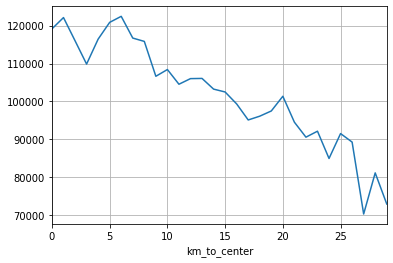

In [33]:
#работа с расстоянием до центра Спб
#выбрали Спб 
spb_flats = data_new.loc[data_new.loc[:,'locality_name']== 'Санкт-Петербург']
#создаем столбец с километрами, округляем до целых значений
spb_flats['km_to_center'] = (spb_flats['cityCenters_nearest'] / 1000).round()
#Группипуем данные по средней цене квадратного метра и строим график
spb_flats_grouped = spb_flats.groupby('km_to_center')['price_per_square_meter'].mean().astype(int)
spb_flats_grouped.plot(x='km_to_center', y='price_per_square_meter', grid = True)


На графике чётко видно, что цена падает с ростом удалённости от центра. Примерно на 10 километрах от центра виден тренд к снижению стоимости кв метра. Интересно, что есть объекты в самом центре с разницей более 10 тыс р. за кв м. Наверное, это коммуналки (но я не знаток питерской недвижимости), но провал очевиден на графике.



count    3504
mean       61
std        21
min        12
25%        44
50%        58
75%        75
max       115
Name: total_area, dtype: int64

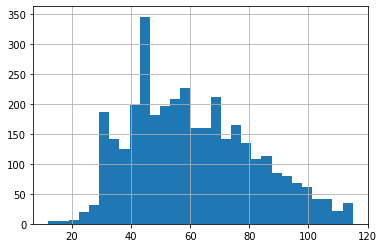

count        3504
mean      6819690
std       2269315
min       1600000
25%       5000000
50%       6650000
75%       8500000
max      11900000
Name: last_price, dtype: int64

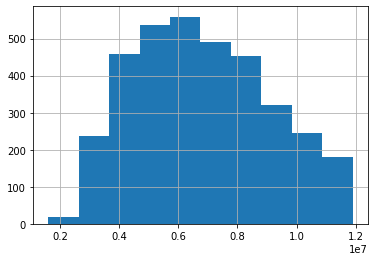

count    3504
mean        2
std         1
min         1
25%         1
50%         2
75%         3
max         6
Name: rooms, dtype: int64

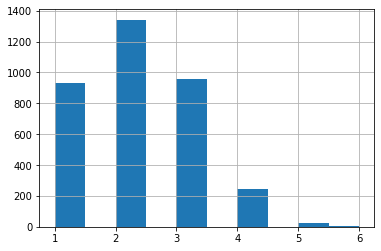

count    3504
mean        3
std         0
min         2
25%         3
50%         3
75%         3
max         5
Name: ceiling_height, dtype: int64

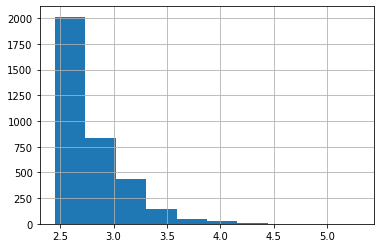

In [34]:
#сравнение данных по центру Спб с остальными
spb_center_flats = data_new.query('locality_name == "Санкт-Петербург" and cityCenters_nearest<= 10000')

display(spb_center_flats['total_area'].describe().round(0).astype(int))
spb_center_flats['total_area'].hist(bins=30)
plt.show()

display(spb_center_flats['last_price'].describe().round(0).astype(int))
spb_center_flats['last_price'].hist(bins=10)
plt.show()


display(spb_center_flats['rooms'].describe().round(0).astype(int))
spb_center_flats['rooms'].hist(bins=10)
plt.show()

display(spb_center_flats['ceiling_height'].describe().round(0).astype(int))
spb_center_flats['ceiling_height'].hist()
plt.show()

Число значений, соответствующие названию Санкт-Петербург и удалённости не более 10 км от центра - 3504. 

Общая площадь: средняя - 61 кв м, медиана - 58, мин 12, макс 115. Существенно не отличается от других данных.

Цена продажи: средняя 6,8 млн, медиана - 6,6 млн., мин 1,6, макс - 11,9. Здесь цены выше, чем в остальном датафрейме, но и данные почище, размах не такой большой.

Комнаты: среднее кол-во комнат - 2, мин 1, макс 6. (среднее не отличается, а максимум мы ограничили ранее)

Потолки: среднее - 3м, мин 1, макс 6 метров. (почти не отличается, особенно, если учесть предобработку)

'корреляция цены с удалённостью от центра'

-0.34545020498884443

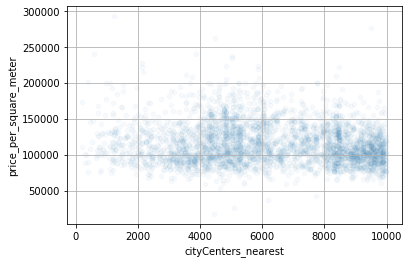

'корреляция цены с кол-вом комнат'

0.4901777869903894

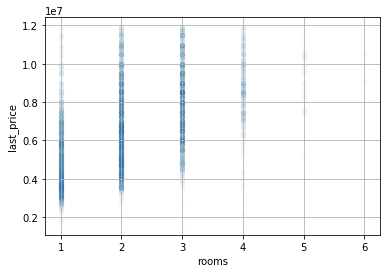

In [35]:
display('корреляция цены с удалённостью от центра',spb_center_flats['last_price'].corr(spb_center_flats['cityCenters_nearest']))
spb_center_flats.plot(x='cityCenters_nearest', y='price_per_square_meter', kind='scatter', alpha=0.03, grid=True)
plt.show()
display('корреляция цены с кол-вом комнат',spb_center_flats['last_price'].corr(spb_center_flats['rooms']))
spb_center_flats.plot(x='rooms', y='last_price', kind='scatter', alpha=0.02, grid=True)
plt.show()

Корреляция цены с удалённостью от центра -0,34: Чем удалённее, тем дешевле.
Корреляция цены с кол-вом комнат 0,49 - чем больше комнат, тем дороже. Для двухкомнатных эта корреляция самая явная.

(0, 200000)

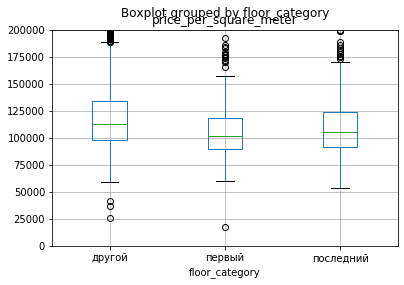

In [36]:
spb_center_flats.boxplot(column='price_per_square_meter', by='floor_category')
plt.ylim(0, 200000)

Корреляция стоимости от этажа: медианная цена промежуточных этажей выше, чем первого и последнего. (также как и в остальном датафрейме)

,price_per_square_meter
weekday,
0,111027.902540
1,109677.419355
2,110409.142631
3,110000.000000
4,108597.285068
5,113541.666667
6,111111.111111


([<matplotlib.axis.XTick at 0x7fe44426ad50>,
 <a list of 7 Text xticklabel objects>)

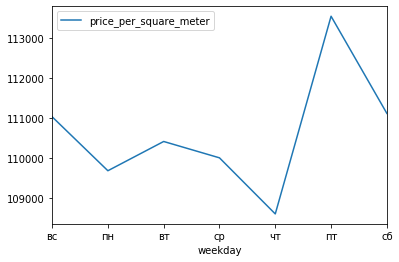

In [37]:
#display('корреляция цены с днём размещения', spb_center_flats['price_per_square_meter'].corr(spb_center_flats['weekday']))
#display('корреляция цены с месяцем размещения', spb_center_flats['price_per_square_meter'].corr(spb_center_flats['month']))
#display('корреляция цены с годом размещения', spb_center_flats['price_per_square_meter'].corr(spb_center_flats['year']))

report = spb_center_flats.groupby('weekday').agg({'price_per_square_meter': 'median'})
display(report)
report.plot()
plt.xticks(report.index.values, ['вс', 'пн', 'вт', 'ср', 'чт', 'пт', 'сб'])

Удивительно, но в Питере пятница - день самого дорогого квадратного метра.

,price_per_square_meter
month,
1,109878.048780
2,107368.421053
3,113043.478261
4,112307.692308
5,110256.481585
6,108059.701493
7,109274.193548
8,112096.774194
9,113057.324841


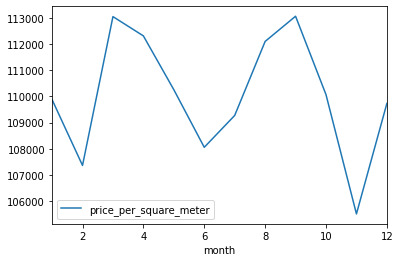

In [38]:
report = spb_center_flats.groupby('month').agg({'price_per_square_meter': 'median'})
display(report)
report.plot()

Если апрель и август отражают ту же картину, что и в остальном датафрейме, то ноябрь в Питере - не самый жаркий месяц с точки зрения цены за квадрат.

,price_per_square_meter
year,
2014,110375.000000
2015,105555.555556
2016,105414.728899
2017,107435.152807
2018,112520.096463
2019,118750.000000


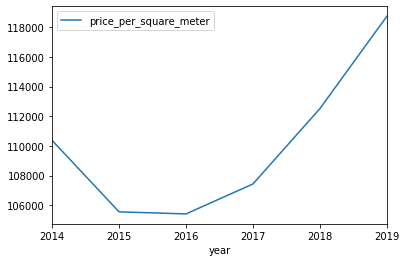

In [39]:
report = spb_center_flats.groupby('year').agg({'price_per_square_meter': 'median'})
display(report)
report.plot()

В Питере рост цен на кв метр начался раньше примерно на год.

## Общий вывод

Данные в таблице были "склеены", было необходимо привести в презентабельный вид. Очень было много пропусков. Думаю, основная причина пропусков первого раздела - человеческий фактор и особенности объекта, а пропуски в картографических данных имеют техническую природу. Вторых было очень много, и команде необходимо над этим поработать, чтобы улучшить результат.

К данным рассчитали и добавили - цена за квадратный метр, день недели, месяц, год продажи, соотношения жилой и общей площади, а также площади кухни к общей.

Исследование в "первом приближении" показало: 
- Гистограмма по общей площади описывает нормальное распределение. По диаграмме размаха видно, что есть выбросы. 
- Средняя цена объекта - 4,5 млн. Минимальная - 12 т.р. Максимальная - 763 млн. Разброс огромный; много выбросов.
- Среднее и медианное число комнат - 2. Странное значение числа комнат = 0 вызвало недоумение. 
- Средняя и медиана высоты потолков - 3м. Минимум 1, Максимум 100. Сразу видна нестандартность культурной столицы.
- Корреляция цены с общ площадью - 0.65. Объяснимая зависимость, стремится к 1, но не сильно; корреляция положительная. Корреляция цены с кол-вом комнат - 0.36 - не сильно выраженная. Корреляция цены с высотой потолков - 0.06 - можно сказать, что нет такой зависимости.
- продажа обычно занимает от 45 до 201 дня. В среднем (если можно так сказать о медианном значении) - 95 дней. Полагаю, что продажа в срок до 45 дней - очень быстрая, а дольше 201 дня - долгая.

Далее я оценила и удалила выбивающиеся значения и создала data_new.
- Убрала значения общей площади более 115 кв.м. 
- Минимум цены установили 400 т.р., максимум 11,9 млн руб.
- минимальное количество комнат 1; максимум - 6.
- Потолки обрезали значениями 2,45 и 6 метров.

Далее выяснилось, что площадь и число комнат в наибольшей степени влияют на стоимость квартир. 

Определили, что самая высокая цена за кв м в Питере - 105602 рубля, самая низкая из десяти населённых пунктов с наибольшим числом объявлений в Выборге - 58326 рублей.

Цена падает с ростом удалённости от центра. Примерно на 10 километрах от центра виден тренд к снижению стоимости кв метра. Интересно, что есть объекты в самом центре Питера с разницей более 10 тыс р. за кв м. 

Основные корреляции и параметры по центру Санкт-Петербурга существенно не отличаются от остальных мест в Ленинградской области и окраинах Петербурга, за исключением ценовых характеристик. Немного отличаются нелинейные зависимости: в ноябре цена кв метра в Питере ниже, чем в остальных местах. И рост цен начался раньше на год.

Особых сюрпризов результаты анализа данных недвижимости не принесли, всё было логично и понятно, за исключением выбивающихся значений. Интересно было бы разобраться с ними. А также выяснить причины большого количества пропусков в картографических данных.

